# 2D Geometric Tranformation

In [334]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [335]:
def get_grid(height, width, homogenous=False):
    coords = np.indices((height, width)).reshape(2, -1) 
    # Get indices of matrix (x, y)
    # [r1, r2, r3]
    # [c1, c2, c3]

    return np.vstack((coords, np.ones(coords.shape[1]))).astype(np.int32) if homogenous else coords
    # Get indices of matrix (x, y, 1)
    # [r1, r2, r3]
    # [c1, c2, c3]
    # [ 1,  1,  1]

coords = get_grid(height=3, width=2, homogenous=True)
print(coords)

[[0 0 1 1 2 2]
 [0 1 0 1 0 1]
 [1 1 1 1 1 1]]


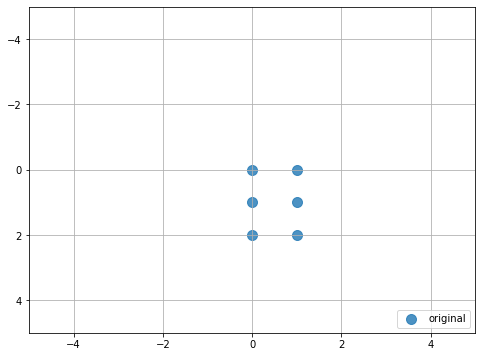

In [336]:
def grid_plotter(points, labels):
    markers = ['o', 'x', 's', '^', 'p', 'v']
    fig, ax = plt.subplots(figsize=(8,6))

    for i, p in enumerate(points):
        x, y = p[1], p[0]
        ax.scatter(x, y, label=labels[i], marker=markers[i], alpha=0.8, s=100)
    
    ax.legend(loc='lower right')
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.invert_yaxis()
    ax.grid(True)
    plt.show()

grid_plotter([coords], labels=['original'])

In [337]:
def show_image(img):
    fig, ax = plt.subplots(figsize=(8,6))
    ax.imshow(img)
    plt.show()

In [338]:
# Define tranformations
def get_rotation(angle):
    angle = np.radians(angle)
    return np.array([
        [np.cos(angle), -np.sin(angle), 0],
        [np.sin(angle), np.cos(angle), 0],
        [0, 0, 1]
    ])

def get_translation(dx, dy):
    return np.array([
        [1, 0, dx],
        [0, 1, dy],
        [0, 0, 1]
    ])

def get_scale_reflex(sx, sy):
    return np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ])

R1 = get_rotation(angle=0)
T1 = get_translation(dx=0.5, dy=0.5)
S1 = get_scale_reflex(sx=5, sy=5)

print('R1:', R1)
print('T1:', T1)
print('S1:', S1)

R1: [[ 1. -0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
T1: [[1.  0.  0.5]
 [0.  1.  0.5]
 [0.  0.  1. ]]
S1: [[5 0 0]
 [0 5 0]
 [0 0 1]]


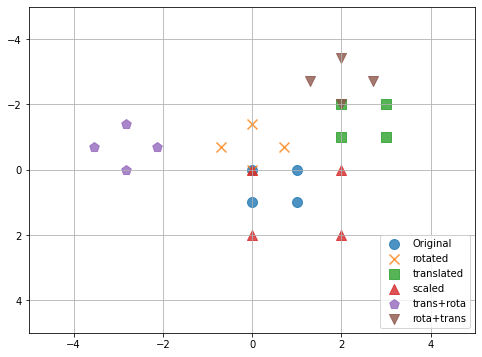

In [339]:
# Default plot
coords = get_grid(height=2, width=2, homogenous=True)

R1 = get_rotation(angle=135)
T1 = get_translation(dx=-2, dy=2)
S1 = get_scale_reflex(sx=2, sy=2)

# Apply transformation
coords_rot = R1 @ coords
coords_trans = T1 @ coords
coords_scale = S1 @ coords
coords_composite1 = R1 @ T1 @ coords
coords_composite2 = T1 @ R1 @ coords

grid_plotter([coords, coords_rot, coords_trans, coords_scale, coords_composite1, coords_composite2], 
            labels=['Original', 'rotated', 'translated', 'scaled', 'trans+rota', 'rota+trans'])

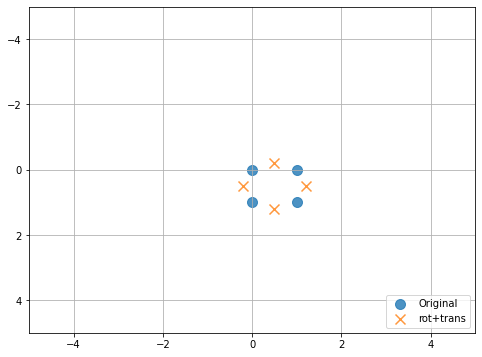

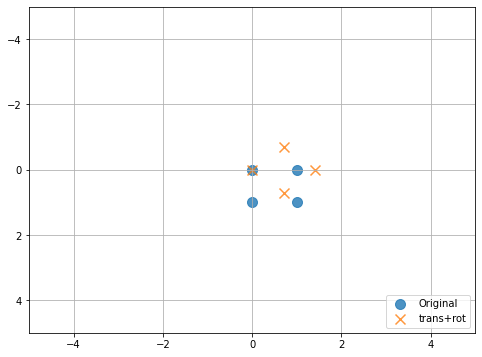

In [340]:
# Difference between trans+rot & rot+trans
coords = get_grid(height=2, width=2, homogenous=True)

R1 = get_rotation(angle=45)
T1 = get_translation(dx=.5, dy=.5)
S1 = get_scale_reflex(sx=2, sy=2)

coords_trans = np.linalg.inv(T1) @ coords
coords_composite1 = T1 @ R1 @ np.linalg.inv(T1) @ coords
coords_composite2 = R1 @ T1 @ np.linalg.inv(T1) @ coords


grid_plotter([coords, coords_composite1], labels=['Original', 'rot+trans'])
grid_plotter([coords, coords_composite2], labels=['Original', 'trans+rot'])

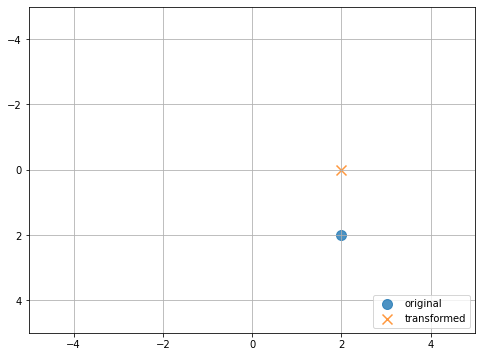

In [341]:
# Trying with a special coordinate
p = [[2], [2], [1]]

R1 = get_rotation(angle=90)
T1 = get_translation(dx=1, dy=1)
S1 = get_scale_reflex(sx=5, sy=5)

p_trans = np.linalg.inv(T1) @ p
p_composite1 = R1 @ np.linalg.inv(T1) @ p
p_composite2 = T1 @ R1 @ np.linalg.inv(T1) @ p

#grid_plotter([p, p_trans], labels=['single_point', 'centered'])
#grid_plotter([p_trans, p_composite1], labels=['centered', 'rotated'])
#grid_plotter([p_composite1, p_composite2], labels=['rotated', 'original'])
grid_plotter([p, p_composite2], labels=['original', 'transformed'])

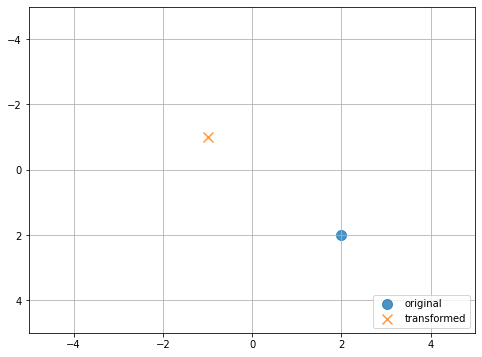

In [343]:
# Trying with a reflex (RX) coordinate
p = [[2], [2], [1]]

R1 = get_rotation(angle=90)
T1 = get_translation(dx=1, dy=1)
RX1 = get_scale_reflex(sx=-1, sy=1)

p_composite2 = R1 @ RX1 @ np.linalg.inv(T1) @ p

grid_plotter([p, p_composite2], labels=['original', 'transformed'])

## Image Warping

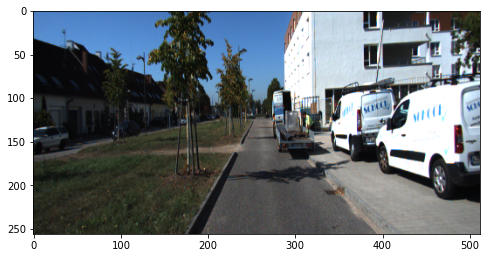

In [345]:
image_path = 'left.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (512, 256))

fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(image)
plt.show()

### Parameters

In [346]:
height, width = image.shape[:2]
tx, ty = np.array((height//2, width//2))
angle = np.radians(90)
scale = 1.0

print('height:', height)
print('width:', width)

height: 256
width: 512


In [347]:
R = np.array([
    [np.cos(angle), np.sin(angle), 0],
    [-np.sin(angle), np.cos(angle), 0],
    [0, 0, 1]
])

T = np.array([
    [1, 0, tx],
    [0, 1, ty],
    [0, 0, 1]
])

T2 = np.array([
    [1, 0, ty],
    [0, 1, tx],
    [0, 0, 1]
])

S = np.array([
    [scale, 0, 0],
    [0, scale, 0],
    [0, 0, 1]
])

A = T2@R@S@np.linalg.inv(T)
Ainv = np.linalg.inv(A)

In [348]:
# Grid to represent the image coordinates I (x, y)
coords = get_grid(height, width, True)
print(coords)
x1, y1 = coords[0], coords[1]

# Apply transformation and nearest neighbor interpolation
warp_coords = np.round(A @ coords).astype(np.int32)
x2, y2 = warp_coords[0, :], warp_coords[1, :]

# Get pixels within image
indices = np.where((x2 >= 0) & (x2 < width) &
                    (y2 >= 0) & (y2 < height))

xpix2, ypix2 = x2[indices], y2[indices]
xpix1, ypix1 = x1[indices], y1[indices]

[[  0   0   0 ... 255 255 255]
 [  0   1   2 ... 509 510 511]
 [  1   1   1 ...   1   1   1]]


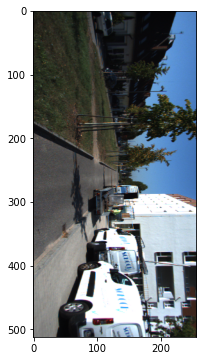

In [349]:
# Copy the values to new image I'(x, y)
canvas = np.zeros((width, height, 3))
canvas = canvas.astype(int)
canvas[xpix2, ypix2] = image[xpix1, ypix1]
show_image(canvas)

In [350]:
def get_transformed_matrix(angle, rot, tx, ty, sx, sy):
    R = np.array([
        [np.cos(angle), np.sin(angle), 0],
        [-np.sin(angle), np.cos(angle), 0],
        [0, 0, 1]
    ])

    T = np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])

    if rot % 180 == 0:
        T2 = np.array([
            [1, 0, tx],
            [0, 1, ty],
            [0, 0, 1]
        ])
    else:
        T2 = np.array([
            [1, 0, ty],
            [0, 1, tx],
            [0, 0, 1]
        ])

    S = np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ])

    A = T2@R@S@np.linalg.inv(T)
    return A

In [351]:
def get_based_on_rotation(img, rot, tx, ty, sx, sy):
    angle = np.radians(rot)
    A = get_transformed_matrix(angle, rot, tx, ty, sx, sy)
    
    # Grid to represent the image coordinates I (x, y)
    coords = get_grid(height, width, True)
    x1, y1 = coords[0], coords[1]

    # Apply transformation and nearest neighbor interpolation
    warp_coords = np.round(A @ coords).astype(np.int32)
    x2, y2 = warp_coords[0, :], warp_coords[1, :]

    # Get pixels within image
    if rot % 180 == 0:
        indices = np.where((x2 >= 0) & (x2 < height) &
                        (y2 >= 0) & (y2 < width))
    else:
        indices = np.where((x2 >= 0) & (x2 < width) &
                        (y2 >= 0) & (y2 < height))

    xpix2, ypix2 = x2[indices], y2[indices]
    xpix1, ypix1 = x1[indices], y1[indices]

    # Copy the values to new image I'(x, y)
    if rot % 180 == 0:
        canvas = np.zeros((height, width, 3))
    else:
        canvas = np.zeros((width, height, 3))
        
    canvas = canvas.astype(int)
    canvas[xpix2, ypix2] = img[xpix1, ypix1]
    show_image(canvas)
    return canvas

In [352]:
def image_augmentation(img):
    height, width = img.shape[:2]
    tx, ty = np.array((height//2, width//2))
    rotations = [0]

    for rot in rotations:
        get_based_on_rotation(img, rot, tx, ty, sx=1, sy=1)
        get_based_on_rotation(img, rot, tx, ty, sx=-1, sy=1)

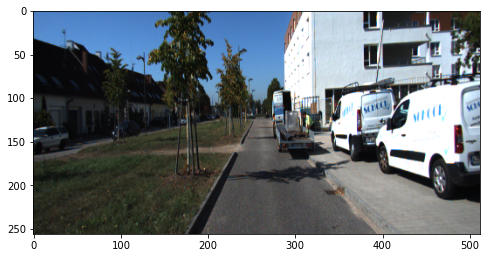

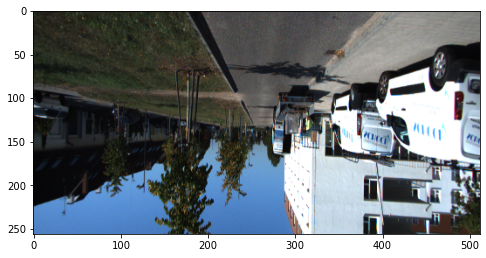

In [353]:
image_augmentation(image)

In [436]:
def print_points_image(source, target, title='', img=None):
    fig, ax = plt.subplots(figsize=(8,6))

    if img is not None:
        ax.imshow(img)

    x, y = source[1], source[0]
    #ax.scatter(x, y, label='source', marker='o', alpha=0.8, s=200, c='r')
    
    x, y = target[1], target[0]
    #ax.scatter(x, y, label='target', marker='x', alpha=0.8, s=300, c='y')
    ax.fill(x, y, label='target', alpha=0.5, c='r')

    
    ax.legend()
    ax.set_xlim(-10, 650)
    ax.set_ylim(-10, 550)
    ax.invert_yaxis()
    ax.grid(True)
    ax.set_title(title)
    plt.show()

In [437]:
def write_points(path, coords):
    with open(path, 'w') as f:
        for i in range(len(coords[0])):
            x = coords[0][i]
            y = coords[1][i]
            f.write(str(x)+','+str(y)+'\n')
    f.close()

In [438]:
def transformed_pts(img, pts):
    height, width = img.shape[:2]
    tx, ty = np.array((height//2, width//2))
    rotations = [0, 90, 180, 270]

    for rot in rotations:
        angle = np.radians(rot)
        A = get_transformed_matrix(angle, rot, tx, ty, sx=1, sy=1)
        warp_coords = np.round(A@pts).astype(np.int32)
        #print(pts)
        #print('rot'+str(rot), ':', warp_coords)
        auximg = get_based_on_rotation(img, rot, tx, ty, sx=1, sy=1)
        cv2.imwrite('./output/rot'+str(rot)+'.jpg', auximg)
        print_points_image(pts, warp_coords, 'rot'+str(rot), auximg)
        write_points('./output/rot'+str(rot)+'.txt', warp_coords)
    
    # Changint the source (just for plot)
    A = get_transformed_matrix(0, 0, tx, ty, sx=-1, sy=1)
    auxpts = np.round(A@pts).astype(np.int32)

    for rot in rotations:
        angle = np.radians(rot)
        A = get_transformed_matrix(angle, rot, tx, ty, sx=-1, sy=1)
        warp_coords = np.round(A@pts).astype(np.int32)
        #print(auxpts)
        #print('reflex+rot'+str(rot), ':', warp_coords)
        auximg = get_based_on_rotation(img, rot, tx, ty, sx=-1, sy=1)
        cv2.imwrite('./output/reflex+rot'+str(rot)+'.jpg', auximg)
        print_points_image(auxpts, warp_coords, 'reflex+rot'+str(rot), auximg)
        write_points('./output/reflex+rot'+str(rot)+'.txt', warp_coords)



[[], [], []]
[[50, 20, 30, 100, 155], [50, 20, 30, 200, 220], [1, 1, 1, 1, 1]]


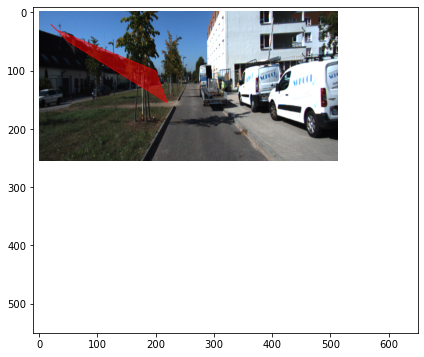

In [439]:
# Show the original image

image_name = 'left'
image_path = './input/left.png'

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (512, 256))

fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(image)

pts = [[], [], []]
print(pts)

with open('./input/left.txt', 'r') as f:
    line = f.readline()
    while line != '': 
        line = line.strip()
        line = list(line.split(','))
        line = [int(val) for val in line]
        pts[0].append(line[0]) 
        pts[1].append(line[1])
        pts[2].append(1) 
        line = f.readline()
    f.close()

print(pts)
#ax.scatter(pts[1], pts[0], label='origin', marker='o', alpha=0.8, s=100, c='r')
ax.fill(pts[1], pts[0], label='origin', alpha=0.5, c='r')

ax.set_xlim(-10, 650)
ax.set_ylim(-10, 550)
ax.invert_yaxis()
plt.show()

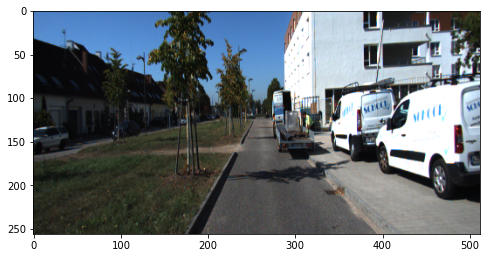

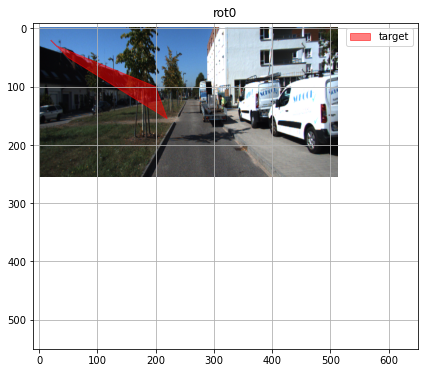

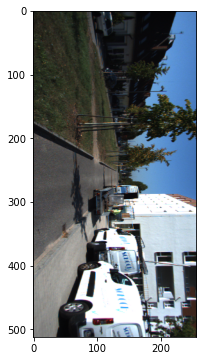

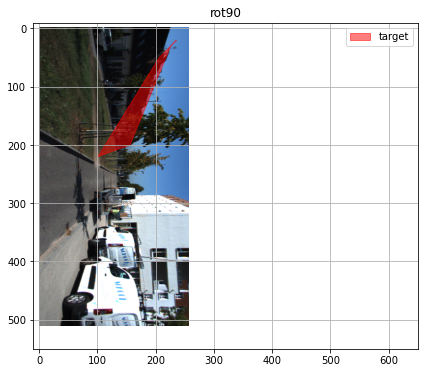

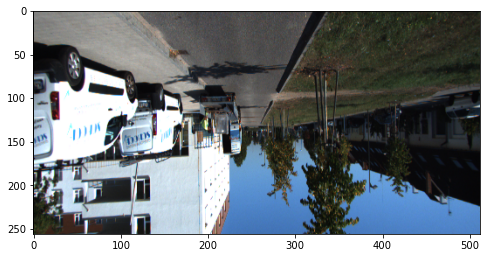

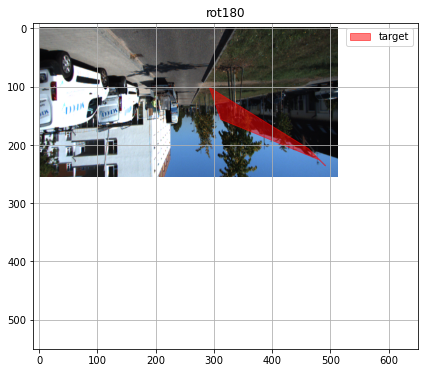

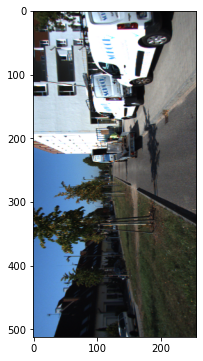

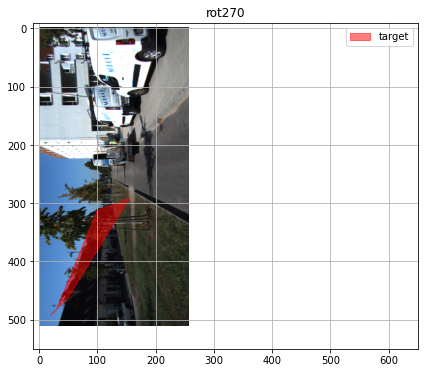

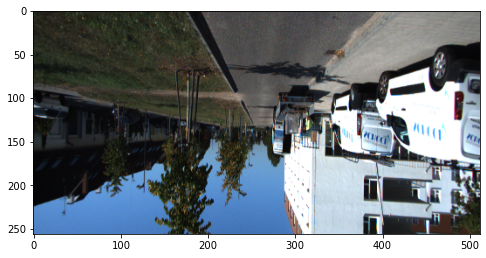

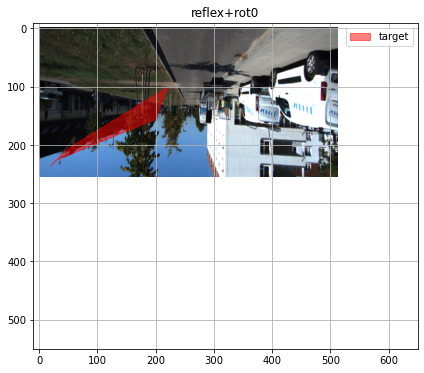

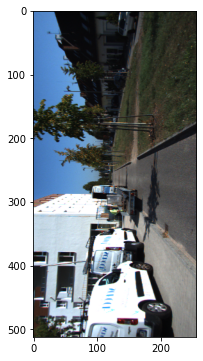

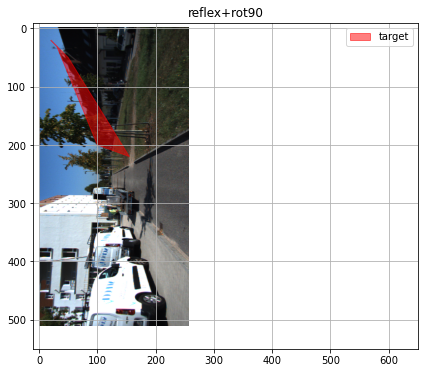

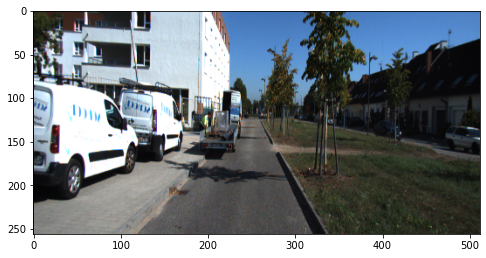

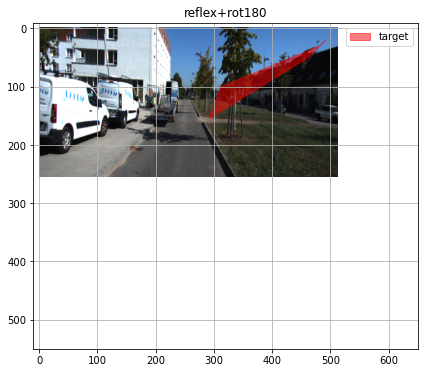

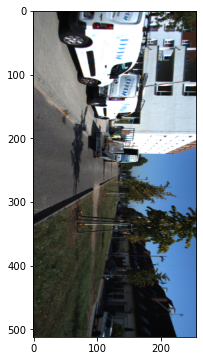

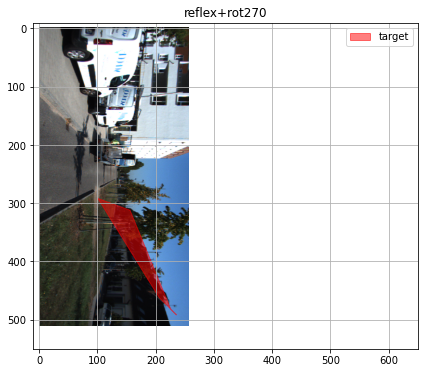

In [440]:
# pts = [[0, 50],
#     [0, 20],
#     [1, 1]]
# img: we will be working with the same image

transformed_pts(image, pts)

## Inverse Warp

In [240]:
# set up pixel coordinate I'(x, y)
coords = get_grid(width, height, True)
x2, y2 = coords[0], coords[1]

# Apply inverse transform and round it (nearest neighbour interpolation)
warp_coords = (Ainv@coords).astype(np.int32)
x1, y1 = warp_coords[0, :], warp_coords[1, :]

# Get pixels within image boundaries
indices = np.where((x1 >= 0) & (x1 < width) &
                   (y1 >= 0) & (y1 < height))

xpix1, ypix1 = x2[indices], y2[indices]
xpix2, ypix2 = x1[indices], y1[indices]

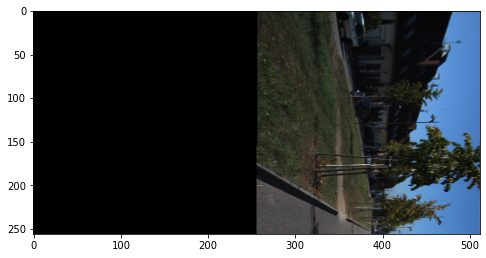

In [241]:
# Map Correspondence
canvas = np.zeros_like(image)
canvas[ypix1, xpix1] = image[ypix2,xpix2]
show_image(canvas)

In [242]:
# Affine Transformation (OpenCV)

def get_affine_cv(t, r, s):
    sin_theta = np.sin(r)
    cos_theta = np.cos(r)

    a_11 = s*cos_theta
    a_21 = -s*sin_theta
    
    a_12 = s*sin_theta
    a_22 = s*cos_theta

    a_13 = t[0] * (1 - s*cos_theta) - s*sin_theta*t[1]
    a_23 = t[1] * (1 - s*cos_theta) + s*sin_theta*t[0]

    return np.array([[a_11, a_12, a_13],
                     [a_21, a_22, a_23]])

A2 = get_affine_cv((tx, ty), angle, scale)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


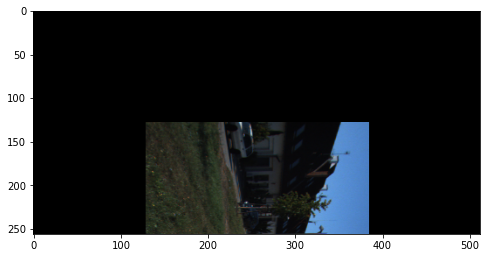

In [243]:
warped = cv2.warpAffine(image, A2, (width, height))
print(warped)
show_image(warped)

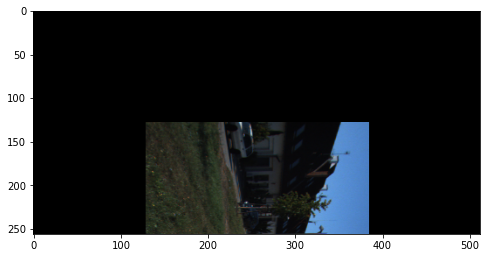

In [244]:
# Using cv2.getRotationMatrix2D

tx = int(tx)
ty = int(ty)

A3 = cv2.getRotationMatrix2D((tx, ty), 270, scale)

width = int(width)
height = int(height)

warped = cv2.warpAffine(image, A3, (width, height), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=0)
show_image(warped)